In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, norm
from sklearn.model_selection import train_test_split

In [36]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])


In [37]:
inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

common_data = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')

common_data

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9
352,53055,11.9,19.3,4.5


In [17]:
inac_ob

,FIPS,% INACTIVE,% OBESE
0,1011,17.0,18.7
1,2068,16.2,18.9
2,2105,15.0,19.4
3,2195,17.8,17.2
4,2230,15.8,18.3
...,...,...,...
349,51820,16.6,19.5
350,51830,15.7,18.0
351,51840,16.1,19.4
352,53055,11.9,19.3


X = inac_ob.iloc[:, 1].values #upar se neeche full, 1st column
#all the data except the last column which is dependednt variable

y = dataset.iloc[:, -1].values  #upar se neeche, sirf last wala column

In [18]:
X = inac_ob.iloc[:, 1].values #upar se neeche full, 1st column #all the data except the last column which is dependednt variable
y = inac_ob.iloc[:, -1].values #upar se neeche, sirf last wala column


(array([  2.,   1.,  10.,  11.,  82., 140.,  52.,  26.,  16.,  14.]),
 array([ 8.8 ,  9.86, 10.92, 11.98, 13.04, 14.1 , 15.16, 16.22, 17.28,
        18.34, 19.4 ]),
 <BarContainer object of 10 artists>)

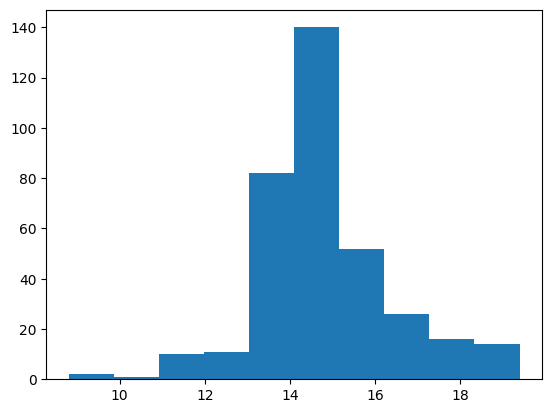

In [19]:
plt.hist(X)

(array([  1.,   0.,   0.,   3.,   4.,   5.,   5.,  37., 157., 142.]),
 array([10.5, 11.4, 12.3, 13.2, 14.1, 15. , 15.9, 16.8, 17.7, 18.6, 19.5]),
 <BarContainer object of 10 artists>)

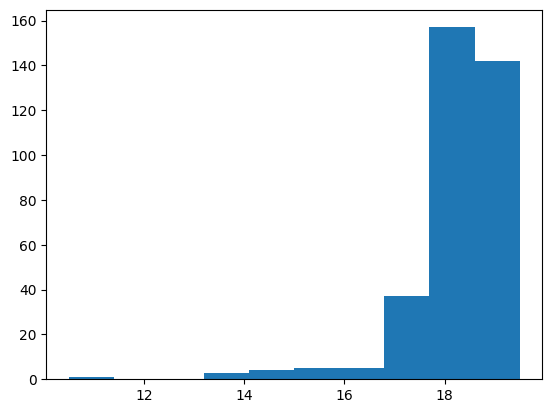

In [20]:
plt.hist(y)

In [21]:
outliers = []

def detect_outliers(data):
    threshold = 3  ##3rd standard deviation
    mean = np.mean(data)
    std= np.std(data)
    mean
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold: ##beyond 3rd SD
            outliers.append(i)
        
    return outliers

inac_outliers = detect_outliers(X)
inac_outliers

[9.4, 8.8]

In [22]:
dataset = sorted(X)

q1, q3 = np.percentile(dataset, [25,75])
print(q1,q3)

14.0 15.475


In [23]:
iqr = q3 - q1 
lower_fence = q1-(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print(lower_fence, higher_fence)

#Anything beyond higher and lower is an outlier

11.787500000000001 17.6875


/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: 0.43
Kurtosis: 1.61


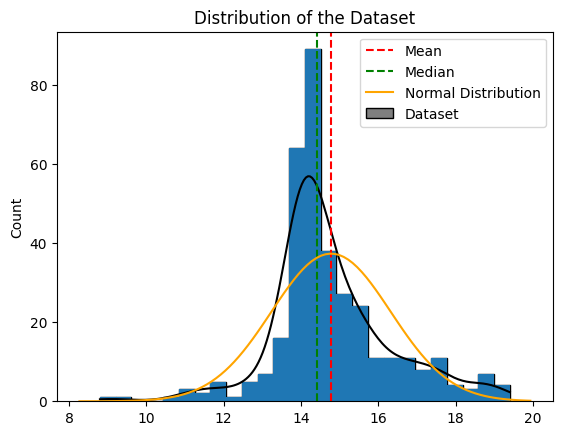

In [24]:
#Plot the distribution of the dataset
sns.histplot(X, kde=True, label='Dataset', color="black")
plt.title('Distribution of the Dataset')

#Calculate skewness and kurtosis
skewness = np.round(skew(X), 2)
kurtosis_value = np.round(kurtosis(X), 2)

#Print skewness and kurtosis values
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis_value}')

#Plot skewness and kurtosis
plt.axvline(x=np.mean(X), color='red', linestyle='--', label='Mean')
plt.axvline(x=np.median(X), color='green', linestyle='--', label='Median')

#Add a symmetric distribution for reference
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
normal_distribution = norm.pdf(x_range, np.mean(X), np.std(X))
bin_width = np.diff(plt.hist(X, bins='auto')[1])[0]
normal_distribution_scaled = normal_distribution * len(X) * bin_width  # Scale by the number of data points

plt.plot(x_range, normal_distribution_scaled, label='Normal Distribution', color='orange')

plt.legend()
plt.show()


In [25]:
#What does this mean?
# The positive kurtosis (1.61) suggests that the distribution has heavier tails and a more peaked central region compared to a normal distribution.
# In the context of inactivity percentage, this could mean that there are clusters of counties with extreme values, either higher or lower than the average inactivity percentage.

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: -2.75
Kurtosis: 12.93


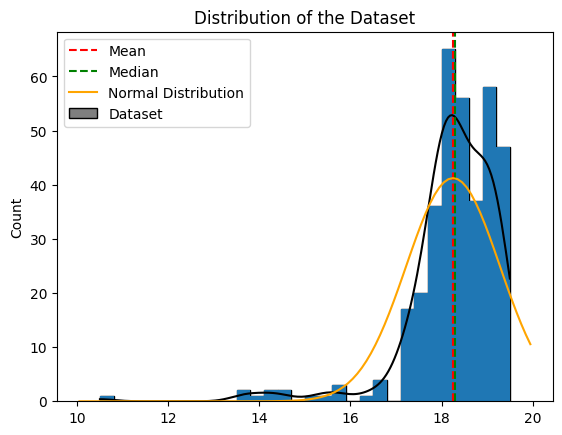

In [26]:
#Same thing for Obesity data
sns.histplot(y, kde=True, label='Dataset', color="black")
plt.title('Distribution of the Dataset')

skewness_obesity = np.round(skew(y), 2)
kurtosis_obesity = np.round(kurtosis(y), 2)

print(f'Skewness: {skewness_obesity}')
print(f'Kurtosis: {kurtosis_obesity}')

#Plot skewness and kurtosis
plt.axvline(x=np.mean(y), color='red', linestyle='--', label='Mean')
plt.axvline(x=np.median(y), color='green', linestyle='--', label='Median')

#Add a symmetric distribution for reference
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
normal_distribution = norm.pdf(x_range, np.mean(y), np.std(y))
bin_width = np.diff(plt.hist(y, bins='auto')[1])[0]
normal_distribution_scaled = normal_distribution * len(y) * bin_width  # Scale by the number of data points

plt.plot(x_range, normal_distribution_scaled, label='Normal Distribution', color='orange')

plt.legend()
plt.show()


In [27]:

X1 = inac_ob.iloc[:, 1:-1].values #upar se neeche full, left se second last column tak jo ki independent hai
#all the data except the last column which is dependednt variable

y1 = inac_ob.iloc[:, -1].values  #upar se neeche, sirf last wala column

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 1/3, random_state = 0)


In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)

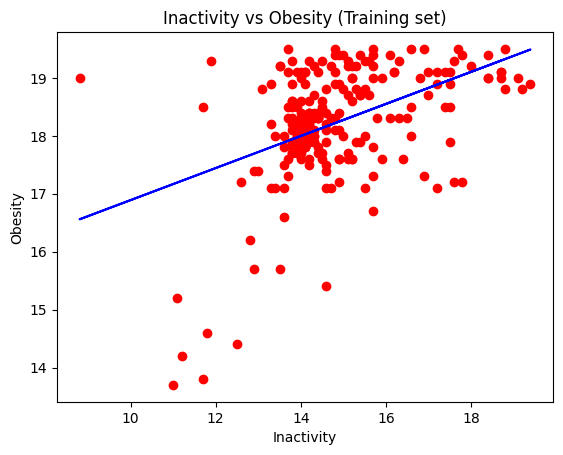

In [30]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Inactivity vs Obesity (Training set)')
plt.xlabel('Inactivity')
plt.ylabel('Obesity')
plt.show()

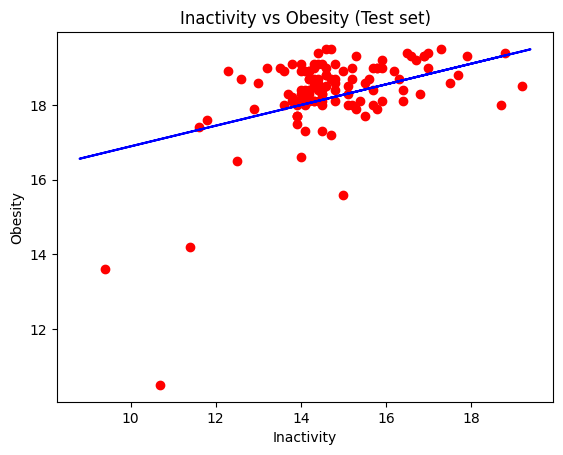

In [31]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Inactivity vs Obesity (Test set)')
plt.xlabel('Inactivity')
plt.ylabel('Obesity')
plt.show()

In [32]:
#Evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.24105062539905087

In [34]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(regressor, X1, y1, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R-squared scores:", cross_val_scores)

# Print the mean and standard deviation of the scores
print(f"Mean R-squared: {np.mean(cross_val_scores):.2f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.2f}")

Cross-Validation R-squared scores: [ 0.21879362 -0.00915571  0.07850856 -0.0476226   0.20845006]
Mean R-squared: 0.09
Standard Deviation: 0.11


In [ ]:
# An R-squared value of 0.24 in a simple linear regression model implies that the model explains 24% of the variance in the response variable (obesity percentage) based on the predictor variable (inactivity percentage). Here are some insights you can draw from this result:
#That is only 24% of the variability in obesity percentage is captured by the linear relationship with inactivity percentage.


# Weak Predictive Power:

# An R-squared value of 0.24 suggests that the inactivity percentage alone explains only a moderate portion of the variation in obesity percentage.
# The model does not capture a substantial amount of variability in obesity percentage, indicating that other factors not considered in the model may contribute significantly.

# Limitations of a Linear Relationship:
# The linear relationship between inactivity percentage and obesity percentage might not be very strong or might not exist.
# Non-linear relationships or interactions with other variables may be influencing obesity rates.
# Consider Additional Features:

# The model may benefit from additional features that could better explain the variability in obesity percentage.
# Consider exploring other socio-economic, demographic, or lifestyle factors that could contribute to obesity.
# Residual Analysis:

# Analyze the residuals (differences between predicted and actual values) to check for patterns or trends.
# Large residuals might indicate areas where the model performs poorly or where other factors are at play.
# Statistical Significance:

# Check the statistical significance of the coefficients in the regression model.
# If the inactivity percentage is not statistically significant, it may imply that it is not a strong predictor of obesity percentage.
# Outliers and Influential Points:

# Identify and investigate potential outliers or influential data points that might be affecting the model.
# Outliers can disproportionately influence regression results.
# Explore Non-linear Models:

# If the relationship between inactivity percentage and obesity is non-linear, consider using non-linear regression models or polynomial regression.
# Cross-Validation:

# Perform cross-validation to assess the model's generalization performance on different subsets of the data.
# Evaluate the model on a holdout dataset to ensure it doesn't overfit the training data.
# In summary, an R-squared of 0.24 indicates that the current model has limited explanatory power. Further analysis, inclusion of additional relevant features, and consideration of more complex models may improve the predictive accuracy of the obesity percentage based on inactivity percentage.


In [286]:
#X_train is already sorted
is_sorted = np.all(np.diff(y_train) >= 0)

if is_sorted:
    print("Data is sorted.")
else:
    print("Data is not sorted. Sorting now...")
    # Sort the data
    y_train = np.sort(y_train)
    print("Sorted data:", y_train)

Data is not sorted. Sorting now...
Sorted data: [13.7 13.8 14.2 14.4 14.6 15.2 15.4 15.7 15.7 16.2 16.6 16.7 17.1 17.1
 17.1 17.1 17.1 17.1 17.1 17.2 17.2 17.2 17.2 17.3 17.3 17.3 17.4 17.4
 17.4 17.5 17.5 17.5 17.6 17.6 17.6 17.6 17.6 17.6 17.6 17.6 17.6 17.6
 17.6 17.7 17.7 17.7 17.7 17.7 17.7 17.7 17.7 17.8 17.8 17.8 17.8 17.8
 17.8 17.8 17.8 17.8 17.9 17.9 17.9 17.9 17.9 17.9 17.9 17.9 17.9 17.9
 17.9 17.9 18.  18.  18.  18.  18.  18.  18.  18.  18.  18.  18.  18.
 18.  18.  18.  18.  18.  18.1 18.1 18.1 18.1 18.1 18.1 18.1 18.1 18.1
 18.1 18.1 18.1 18.1 18.2 18.2 18.2 18.2 18.2 18.2 18.2 18.2 18.2 18.2
 18.2 18.2 18.3 18.3 18.3 18.3 18.3 18.3 18.3 18.3 18.3 18.3 18.3 18.3
 18.3 18.3 18.3 18.3 18.3 18.3 18.3 18.4 18.4 18.4 18.4 18.4 18.4 18.4
 18.4 18.4 18.5 18.5 18.5 18.5 18.5 18.5 18.5 18.5 18.6 18.6 18.6 18.6
 18.6 18.6 18.7 18.7 18.7 18.7 18.7 18.7 18.8 18.8 18.8 18.8 18.8 18.8
 18.8 18.9 18.9 18.9 18.9 18.9 18.9 18.9 18.9 19.  19.  19.  19.  19.
 19.  19.  19.  19.  19.  19.  

In [ ]:
# Polynomial Regression

In [388]:
# Create Polynomial Features
poly_degree =5
poly_reg = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_reg.fit_transform(X_train) 

#transforms the original features (X_train) into polynomial features up to the specified degree.

In [389]:
#Step 4: Apply the same transformations to the test set
X_test_poly = poly_reg.transform(X_test)


#Scale the Features using StandardScaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)




In [390]:
#Train the Polynomial Regression Model
regressor = LinearRegression()
regressor.fit(X_train_poly_scaled, y_train)

#Make Predictions
y_pred = regressor.predict(X_test_poly_scaled)


In [391]:
#Print Predictions vs Actual values
np.set_printoptions(precision=2) #float 2
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
#Reshape(no of rows, no of columns)
#np.concatenate((A,B), along what axis 0 or 1)

[[18.2  18.1 ]
 [18.21 19.3 ]
 [18.22 18.3 ]
 [18.19 18.3 ]
 [18.2  19.1 ]
 [18.2  18.1 ]
 [18.2  18.7 ]
 [18.18 18.7 ]
 [18.3  14.2 ]
 [18.18 18.9 ]
 [18.26 17.9 ]
 [18.21 18.4 ]
 [18.2  19.1 ]
 [18.19 18.8 ]
 [18.19 18.4 ]
 [18.18 15.6 ]
 [18.19 18.7 ]
 [18.18 17.9 ]
 [18.2  19.  ]
 [18.29 17.6 ]
 [18.21 19.1 ]
 [18.19 18.7 ]
 [18.18 18.4 ]
 [18.18 18.7 ]
 [18.19 17.2 ]
 [18.21 18.3 ]
 [18.28 19.3 ]
 [18.21 16.6 ]
 [18.3  17.4 ]
 [18.21 17.3 ]
 [18.2  18.4 ]
 [18.18 19.  ]
 [18.21 19.3 ]
 [18.21 18.3 ]
 [18.19 19.1 ]
 [18.27 18.7 ]
 [18.33 19.4 ]
 [18.21 18.9 ]
 [18.22 17.7 ]
 [18.22 17.7 ]
 [18.2  18.7 ]
 [18.19 18.4 ]
 [18.22 18.  ]
 [18.21 18.2 ]
 [18.21 18.9 ]
 [18.22 17.5 ]
 [18.18 19.3 ]
 [18.18 18.3 ]
 [18.25 18.6 ]
 [18.19 18.4 ]
 [18.2  18.7 ]
 [18.19 17.3 ]
 [18.21 18.1 ]
 [18.18 17.9 ]
 [18.18 18.1 ]
 [18.33 18.  ]
 [18.22 18.1 ]
 [18.18 18.  ]
 [18.22 18.2 ]
 [18.19 18.  ]
 [18.18 19.  ]
 [18.18 18.  ]
 [18.21 18.4 ]
 [18.19 19.1 ]
 [18.2  18.4 ]
 [18.18 19.  ]
 [18.2  18

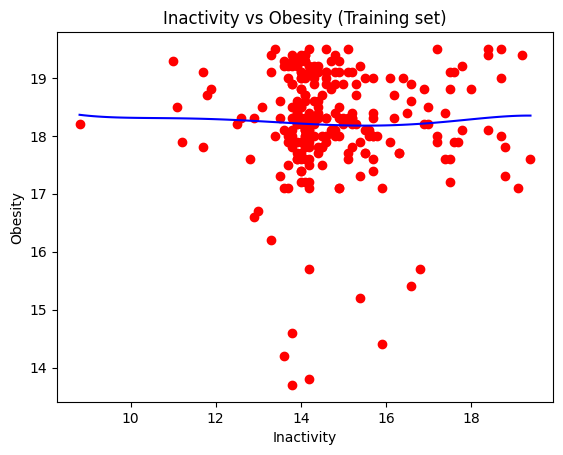

In [392]:
#Plot the Regression Line
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = poly_reg.transform(X_range)
X_range_scaled = scaler.transform(X_range_poly)

plt.scatter(X_train, y_train, color='red')  
plt.plot(X_range, regressor.predict(X_range_scaled), color='blue')  
plt.title('Inactivity vs Obesity (Training set)')
plt.xlabel('Inactivity')
plt.ylabel('Obesity')
plt.show()

In [367]:
r2_score(y_test, y_pred)

-0.04266681612663703

In [361]:
# Print the cross-validation scores
print("Cross-Validation R-squared scores:", cross_val_scores)

# Print the mean and standard deviation of the scores
print(f"Mean R-squared: {np.mean(cross_val_scores):.2f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.2f}")

Cross-Validation R-squared scores: [ 0.22 -0.01  0.08 -0.05  0.21]
Mean R-squared: 0.09
Standard Deviation: 0.11
